<a href="https://colab.research.google.com/github/ManoloSampaio/QuarentenaDeDados/blob/master/Aula1Alura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula 1: Alura

# Códigos da aula para montar o dataframe:

In [0]:
import pandas as pd

In [0]:
filmes = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/movies.csv")
avaliacoes = pd.read_csv("https://github.com/alura-cursos/introducao-a-data-science/blob/master/aula0/ml-latest-small/ratings.csv?raw=true")

In [0]:
filmes.columns = ["filmeId", "titulo", "generos"]
avaliacoes.columns = ["usuarioId", "filmeId", "nota", "momento"]

In [59]:
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [60]:
avaliacoes.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


# Desafio 1:
O Paulo fez uma análise rápida e disse que tem 18 filmes sem avaliações, será que ele acertou?

Determine quantos filmes não tem avaliações e quais são esses filmes.

In [0]:
avaliacoes_media = avaliacoes.groupby("filmeId")["nota"].mean()
filmes_com_nota = filmes.join(avaliacoes_media, on="filmeId")

In [62]:
filmes_sem_avaliacao=filmes_com_nota.loc[pd.isnull(filmes_com_nota['nota'])]
filmes_sem_avaliacao

,filmeId,titulo,generos,nota
816,1076,"Innocents, The (1961)",Drama|Horror|Thriller,NaN
2211,2939,Niagara (1953),Drama|Thriller,NaN
2499,3338,For All Mankind (1989),Documentary,NaN
2587,3456,"Color of Paradise, The (Rang-e khoda) (1999)",Drama,NaN
3118,4194,I Know Where I'm Going! (1945),Drama|Romance|War,NaN
4037,5721,"Chosen, The (1981)",Drama,NaN
4506,6668,"Road Home, The (Wo de fu qin mu qin) (1999)",Drama|Romance,NaN
4598,6849,Scrooge (1970),Drama|Fantasy|Musical,NaN
4704,7020,Proof (1991),Comedy|Drama|Romance,NaN
5020,7792,"Parallax View, The (1974)",Thriller,NaN


# Desafio 2:
Mudar o nome da coluna nota do dataframe filmes_com_media para nota_média após o join.

In [0]:
filmes_com_nota = filmes_com_nota.rename(columns={'nota':'nota_media'})

In [64]:
filmes_com_nota.head()

,filmeId,titulo,generos,nota_media
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


# Desafio 3:
Colocar o número de avaliações por filme, isto é, não só a média mas o TOTAL de votos por filme.

In [65]:
ava=avaliacoes.groupby('filmeId').size()
ava.rename('nAva',inplace=True)
filmes_com_nota = filmes_com_nota.join(ava,on="filmeId")
filmes_com_nota.head()

,filmeId,titulo,generos,nota_media,nAva
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143,7.0
4,5,Father of the Bride Part II (1995),Comedy,3.071429,49.0


# Desafio 4:
Arredondar as médias (coluna de nota média) para duas casas decimais.

In [66]:
filmes_com_nota['nota_media']=filmes_com_nota['nota_media'].round(decimals=2)
filmes_com_nota.head()

,filmeId,titulo,generos,nota_media,nAva
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.43,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.36,7.0
4,5,Father of the Bride Part II (1995),Comedy,3.07,49.0


#Desafio 5:
Descobrir os generos dos filmes (quais são eles, únicos). (esse aqui o bicho pega)

In [67]:
generos_filmes = []
for i in range(0,9742): 
  generos_string=filmes_com_nota['generos'][i].split('|')
  for x in generos_string:
    generos_filmes.append(x)
generos_filmes = pd.unique(generos_filmes)
generos_filmes 

array(['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy',
       'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror',
       'Mystery', 'Sci-Fi', 'War', 'Musical', 'Documentary', 'IMAX',
       'Western', 'Film-Noir', '(no genres listed)'], dtype=object)

## Curiosidade: Que filme teve o gênero não listado:

In [68]:
filmes_sem_genero=filmes_com_nota.loc[filmes_com_nota['generos']=='(no genres listed)']
filmes_sem_genero

,filmeId,titulo,generos,nota_media,nAva
8517,114335,La cravate (1957),(no genres listed),3.00,1.0
8684,122888,Ben-hur (2016),(no genres listed),0.50,1.0
8687,122896,Pirates of the Caribbean: Dead Men Tell No Tal...,(no genres listed),3.79,7.0
8782,129250,Superfast! (2015),(no genres listed),0.50,1.0
8836,132084,Let It Be Me (1995),(no genres listed),2.50,1.0
8902,134861,Trevor Noah: African American (2013),(no genres listed),2.50,1.0
9033,141131,Guardians (2016),(no genres listed),2.50,1.0
9053,141866,Green Room (2015),(no genres listed),3.33,3.0
9070,142456,The Brand New Testament (2015),(no genres listed),4.00,2.0
9091,143410,Hyena Road,(no genres listed),2.00,1.0


# Desafio 6:
Contar o número de aparições de cada genero.

In [69]:
generos_filmes = []
for i in range(0,9742): 
  # Transformando os vetores com | em vetores
  generos_string=filmes_com_nota['generos'][i].split('|')
  # Colocando os generos dentro de uma lista.
  for x in generos_string:
    generos_filmes.append(x)
generos_filmes = pd.DataFrame(generos_filmes)
generos_filmes
generos_filmes.rename(columns={0:'genero'},inplace=True)
n_gen=generos_filmes.groupby('genero').size()
n_gen

genero
(no genres listed)      34
Action                1828
Adventure             1263
Animation              611
Children               664
Comedy                3756
Crime                 1199
Documentary            440
Drama                 4361
Fantasy                779
Film-Noir               87
Horror                 978
IMAX                   158
Musical                334
Mystery                573
Romance               1596
Sci-Fi                 980
Thriller              1894
War                    382
Western                167
dtype: int64

# Desafio 7:
Plotar o gráfico de aparições de cada genero. Pode ser um gráfico de tipo igual a barra.

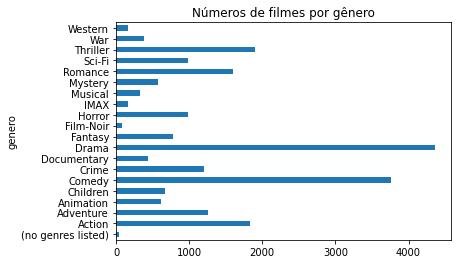

In [70]:
import matplotlib.pyplot as plt
n_gen = pd.DataFrame(n_gen)
n_gen.plot.barh(title="Números de filmes por gênero",legend=False)